In [1]:
%load_ext Cython

In [2]:
%%cython
from draculab import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numpy import sin, cos
%matplotlib notebook
import time

In [4]:
## SETTING THE NETWORK ##

class spinal_cord():
    
    def antagonist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1,
                          alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the antagonist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        #self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = inh_aff_syn
        #self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        #self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = inh_aff_syn
        #self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        #self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        #self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        #self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        #self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        #self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        #self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        #self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        #self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        #self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def antagonist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                               alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        #self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
        #                 self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        #self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        #self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.r_muscle1_2_alpha_muscle1_syn_spec)
        #self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
        #                 self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        #self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        #self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
        #                 self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        #self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        #self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.r_muscle2_2_alpha_muscle2_syn_spec)
        #self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
        #                 self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        #self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)

    def synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                         alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        #self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = exc_aff_syn
        #self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        #self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        #self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = exc_aff_syn
        #self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        #self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        #self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        #self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        #self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        #self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        #self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        #self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        #self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        #self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        #self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                              alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        #self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
        #                 self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        #self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        #self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.r_muscle1_2_alpha_muscle1_syn_spec)
        #self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
        #                 self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        #self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        #self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
        #                 self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        #self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        #self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.r_muscle2_2_alpha_muscle2_syn_spec)
        #self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
        #                 self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        #self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
    
    def partial_synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                                 alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the partial synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Selective afferent synapse dictionary
        sel_aff_syn = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        #self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.ib_muscle1_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle1_2_ib_muscle2_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        #self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.ib_muscle2_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle2_2_ib_muscle1_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        #self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        #self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        #self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        #self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_ib_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        #self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        #self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        #self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        #self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        #self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_ib_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def partial_synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                                      alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        #self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
        #                 self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(alpha_muscle1, r_muscle2, self.alpha_muscle1_2_r_muscle2_conn_spec, 
                         self.alpha_muscle1_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        #self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        #self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.r_muscle1_2_alpha_muscle1_syn_spec)
        #self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
        #                 self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle2, self.r_muscle1_2_alpha_muscle2_conn_spec, 
                         self.r_muscle1_2_alpha_muscle2_syn_spec)
        #self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, ib_muscle2, self.ib_muscle1_2_ib_muscle2_conn_spec, 
                         self.ib_muscle1_2_ib_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        #self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
        #                 self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(alpha_muscle2, r_muscle1, self.alpha_muscle2_2_r_muscle1_conn_spec, 
                         self.alpha_muscle2_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        #self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        #self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.r_muscle2_2_alpha_muscle2_syn_spec)
        #self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
        #                 self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle1, self.r_muscle2_2_alpha_muscle1_conn_spec, 
                         self.r_muscle2_2_alpha_muscle1_syn_spec)
        #self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, ib_muscle1, self.ib_muscle2_2_ib_muscle1_conn_spec, 
                         self.ib_muscle2_2_ib_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
        
    def fully_connected_params(self):
    #Create parameter dictionaries for synapses and connections aiming to connect all neurons from same muscle
        
        # Synapse dictionary
        syn_spec = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                    'type' : synapse_types.static,
                    'inp_ports' : [0]}
        
        self.alpha_2_r_syn_spec = syn_spec
        self.alpha_2_ia_syn_spec = syn_spec
        self.alpha_2_ib_syn_spec = syn_spec
        self.alpha_2_pn_syn_spec = syn_spec
        self.r_2_alpha_syn_spec = syn_spec
        self.r_2_ia_syn_spec = syn_spec
        self.r_2_ib_syn_spec = syn_spec
        self.r_2_pn_syn_spec = syn_spec
        self.ia_2_alpha_syn_spec = syn_spec
        self.ia_2_r_syn_spec = syn_spec
        self.ia_2_ib_syn_spec = syn_spec
        self.ia_2_pn_syn_spec = syn_spec
        self.ib_2_alpha_syn_spec = syn_spec
        self.ib_2_r_syn_spec = syn_spec
        self.ib_2_ia_syn_spec = syn_spec
        self.ib_2_pn_syn_spec = syn_spec
        self.pn_2_alpha_syn_spec = syn_spec
        self.pn_2_r_syn_spec = syn_spec
        self.pn_2_ia_syn_spec = syn_spec
        self.pn_2_ib_syn_spec = syn_spec
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_2_r_conn_spec = conn_spec
        self.alpha_2_ia_conn_spec = conn_spec
        self.alpha_2_ib_conn_spec = conn_spec
        self.alpha_2_pn_conn_spec = conn_spec
        self.r_2_alpha_conn_spec = conn_spec
        self.r_2_ia_conn_spec = conn_spec
        self.r_2_ib_conn_spec = conn_spec
        self.r_2_pn_conn_spec = conn_spec
        self.ia_2_alpha_conn_spec = conn_spec
        self.ia_2_r_conn_spec = conn_spec
        self.ia_2_ib_conn_spec = conn_spec
        self.ia_2_pn_conn_spec = conn_spec
        self.ib_2_alpha_conn_spec = conn_spec
        self.ib_2_r_conn_spec = conn_spec
        self.ib_2_ia_conn_spec = conn_spec
        self.ib_2_pn_conn_spec = conn_spec
        self.pn_2_alpha_conn_spec = conn_spec
        self.pn_2_r_conn_spec = conn_spec
        self.pn_2_ia_conn_spec = conn_spec
        self.pn_2_ib_conn_spec = conn_spec
        
    def fully_connected_connections(self, alpha, ia, ib, pn, r):
        
        self.net.connect(alpha, r, self.alpha_2_r_conn_spec, self.alpha_2_r_syn_spec)
        self.net.connect(alpha, ia, self.alpha_2_ia_conn_spec, self.alpha_2_ia_syn_spec)
        self.net.connect(alpha, ib, self.alpha_2_ib_conn_spec, self.alpha_2_ib_syn_spec)
        self.net.connect(alpha, pn, self.alpha_2_pn_conn_spec, self.alpha_2_pn_syn_spec)
        self.net.connect(r, alpha, self.r_2_alpha_conn_spec, self.r_2_alpha_syn_spec)
        self.net.connect(r, ia, self.r_2_ia_conn_spec, self.r_2_ia_syn_spec)
        self.net.connect(r, ib, self.r_2_ib_conn_spec, self.r_2_ib_syn_spec)
        self.net.connect(r, pn, self.r_2_pn_conn_spec, self.r_2_pn_syn_spec)
        self.net.connect(ia, alpha, self.ia_2_alpha_conn_spec, self.ia_2_alpha_syn_spec)
        self.net.connect(ia, r, self.ia_2_r_conn_spec, self.ia_2_r_syn_spec)
        self.net.connect(ia, ib, self.ia_2_ib_conn_spec, self.ia_2_ib_syn_spec)
        self.net.connect(ia, pn, self.ia_2_pn_conn_spec, self.ia_2_pn_syn_spec)
        self.net.connect(ib, alpha, self.ib_2_alpha_conn_spec, self.ib_2_alpha_syn_spec)
        self.net.connect(ib, r, self.ib_2_r_conn_spec, self.ib_2_r_syn_spec)
        self.net.connect(ib, ia, self.ib_2_ia_conn_spec, self.ib_2_ia_syn_spec)
        self.net.connect(ib, pn, self.ib_2_pn_conn_spec, self.ib_2_pn_syn_spec)
        self.net.connect(pn, alpha, self.pn_2_alpha_conn_spec, self.pn_2_alpha_syn_spec)
        self.net.connect(pn, r, self.pn_2_r_conn_spec, self.pn_2_r_syn_spec)
        self.net.connect(pn, ia, self.pn_2_ia_conn_spec, self.pn_2_ia_syn_spec)
        self.net.connect(pn, ib, self.pn_2_ib_conn_spec, self.pn_2_ib_syn_spec)
    
    def __init__(self):
        
    ########### Fixing random seed
    
        self.seed = 19680801
        np.random.seed(self.seed)
        
    ########### Create parameter dictionaries for network, plant, and units
    
        # Defining network parameters
        self.net_params = {'min_delay': 0.005,
                           'min_buff_size': 10}

        # Defining neurons' parameters
        
        # Neurons' dictionary
        neuron_params = {'type' : unit_types.presyn_inh_sig,
                         'init_val' : 0.,
                         'thresh' : .5,
                         'slope' : 11.,
                         'tau' : 0.02,
                         'HYP' : 2.,
                         'OD' : 2.}
        ia_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        alpha_params = {'type' : unit_types.presyn_inh_sig,
                        'init_val' : 0.,
                        'thresh' : 0.8,
                        'slope' : 5.,
                        'tau' : 0.02,
                        'HYP' : 2.,
                        'OD' : 2.}
        ib_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 2.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        pn_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        
        
        # Muscle 1 neurons
        self.alpha_1_params = alpha_params
        self.pn_1_params = pn_params
        self.ia_1_params = ia_params
        self.r_1_params = neuron_params
        self.ib_1_params = ib_params
        
        # Muscle 2 neurons
        self.alpha_2_params = alpha_params
        self.pn_2_params = pn_params
        self.ia_2_params = ia_params
        self.r_2_params = neuron_params
        self.ib_2_params = ib_params
        
        # Muscle 3 neurons
        self.alpha_3_params = alpha_params
        self.pn_3_params = pn_params
        self.ia_3_params = ia_params
        self.r_3_params = neuron_params
        self.ib_3_params = ib_params
        
        # Muscle 4 neurons
        self.alpha_4_params = alpha_params
        self.pn_4_params = pn_params
        self.ia_4_params = ia_params
        self.r_4_params = neuron_params
        self.ib_4_params = ib_params
        
        # Muscle 5 neurons
        self.alpha_5_params = alpha_params
        self.pn_5_params = pn_params
        self.ia_5_params = ia_params
        self.r_5_params = neuron_params
        self.ib_5_params = ib_params
        
        # Muscle 6 neurons
        self.alpha_6_params = alpha_params
        self.pn_6_params = pn_params
        self.ia_6_params = ia_params
        self.r_6_params = neuron_params
        self.ib_6_params = ib_params

        # Defining arm parameters
        self.arm_params = {'type': plant_models.planar_arm_v3,
                           'mass1': 1.,
                           'mass2': 1.,
                           'init_q1': 0.,
                           'init_q2': np.pi/2.,
                           'init_q1p': 0.,
                           'init_q2p': 0.,
                           'g': 0.0,
                           'mu1': 0.01,
                           'mu2': 0.01,
                           
                           #'s_min' : -0.4,
                           #'p1' : (-0.01, 0.04),
                           #'p2' : (0.29, 0.03),
                           #'p3' : (0., 0.05),
                           #'p5' : (0.01, -0.05),
                           #'p10': (0.29, 0.03),
                           #'l_torque' : 0.01,
                           #'l_visco' : 0.01,
                           'g_e': 20.,
                           #'l0_e' : [1.]*6,
                           #'Ia_gain' : 2.5*np.array([3.,10.,10., 3.,10.,10.]),
                           #'II_gain' : 2.*np.array([3., 8., 8., 3., 8., 8.]),
                           #'Ib_gain' : 5.,
                           #'T_0' : .5,
                           'k_pe_e': 8.,
                           'k_se_e': 13.,
                           #'b_e' : 5.,
                           #'g_s' : 0.02,
                           #'k_pe_s' : 2., 
                           #'k_se_s' : 2.,
                           #'g_d' : 0.01,
                           #'k_pe_d' : .2, #.1,
                           #'k_se_d' : 1., #2.,
                           #'b_s' : .5,
                           #'b_d' : 2.,#3.,
                           #'l0_s': .7,
                           #'l0_d': .8,
                           #'fs' : 0.1,
                           #'se_II' : 0.5,
                           #'cd' : 0.5,
                           #'cs' : 0.5
                          }
        
        # Defining sources' parameters
        self.source_params = {'init_val' : 1.,
                              'type' : unit_types.source,
                              'function' : lambda x: 1.}
        
    ########### Create parameter dictionaries for the synapses and connections
    
        '''    
        # Defining synapses' and connections' specifications to neurons and plant
        
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(0, 5, 6, 7, 9, 17, 18, 19)
        # Muscle 2 - muscle 3
        self.antagonist_params(3, 9, 10, 11, 6, 13, 14, 15)
        # Muscle 5 - muscle 6
        self.antagonist_params(12, 21, 22, 23, 15, 25, 26, 27)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(0, 5, 6, 7, 3, 9, 10, 11)
        # Muscle 1 - muscle 5
        self.synergist_params(0, 5, 6, 7, 12, 21, 22, 23)
        # Muscle 4 - muscle 3
        self.synergist_params(9, 17, 18, 19, 6, 13, 14, 15)
        # Muscle 4 - muscle 6
        self.synergist_params(9, 17, 18, 19, 15, 25, 26, 27)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(3, 9, 10, 11, 12, 21, 22, 23)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(3, 9, 10, 11, 15, 25, 26, 27)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(6, 13, 14, 15, 12, 21, 22, 23)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(6, 13, 14, 15, 15, 25, 26, 27)
        '''
        
        # Defining synapses' specifications to source units

        # PC synapse dictionary
        self.pc_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [1]}
        # IC synapse dictionary
        self.ic_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [2, 2, 2, 2]}   
        
        # Defining connections' specifications to source units

        # PC Connection dictionary
        self.pc_conn_spec = {'rule' : 'one_to_one',
                             'delay' : 0.005}
        # IC connection dictionary 
        self.ic_conn_spec = {'rule' : 'all_to_all',
                             'delay' : 0.005}
        
    def initialize(self):
        
        np.random.seed(self.seed)
        
    ########### Create network, neurons and plant

        self.net = network(self.net_params)
        
        alpha_1 = self.net.create(1, self.alpha_1_params)
        pn_1 = self.net.create(1, self.pn_1_params)
        ia_1 = self.net.create(1, self.ia_1_params)
        r_1 = self.net.create(1, self.r_1_params)
        ib_1 = self.net.create(1, self.ib_1_params)
        self.m1_ids = alpha_1 + pn_1 + ia_1 + r_1 + ib_1
        
        alpha_2 = self.net.create(1, self.alpha_2_params)
        pn_2 = self.net.create(1, self.pn_2_params)
        ia_2 = self.net.create(1, self.ia_2_params)
        r_2 = self.net.create(1, self.r_2_params)
        ib_2 = self.net.create(1, self.ib_2_params)
        self.m2_ids = alpha_2 + pn_2 + ia_2 + r_2 + ib_2
        
        alpha_3 = self.net.create(1, self.alpha_3_params)
        pn_3 = self.net.create(1, self.pn_3_params)
        ia_3 = self.net.create(1, self.ia_3_params)
        r_3 = self.net.create(1, self.r_3_params)
        ib_3 = self.net.create(1, self.ib_3_params)
        self.m3_ids = alpha_3 + pn_3 + ia_3 + r_3 + ib_3
        
        alpha_4 = self.net.create(1, self.alpha_4_params)
        pn_4 = self.net.create(1, self.pn_4_params)
        ia_4 = self.net.create(1, self.ia_4_params)
        r_4 = self.net.create(1, self.r_4_params)
        ib_4 = self.net.create(1, self.ib_4_params)
        self.m4_ids = alpha_4 + pn_4 + ia_4 + r_4 + ib_4
        
        alpha_5 = self.net.create(1, self.alpha_5_params)
        pn_5 = self.net.create(1, self.pn_5_params)
        ia_5 = self.net.create(1, self.ia_5_params)
        r_5 = self.net.create(1, self.r_5_params)
        ib_5 = self.net.create(1, self.ib_5_params)
        self.m5_ids = alpha_5 + pn_5 + ia_5 + r_5 + ib_5
        
        alpha_6 = self.net.create(1, self.alpha_6_params)
        pn_6 = self.net.create(1, self.pn_6_params)
        ia_6 = self.net.create(1, self.ia_6_params)
        r_6 = self.net.create(1, self.r_6_params)
        ib_6 = self.net.create(1, self.ib_6_params)
        self.m6_ids = alpha_6 + pn_6 + ia_6 + r_6 + ib_6
        
        self.arm = self.net.create(1, self.arm_params)

    ########### Connect
    
        #Creating lists with port numbers
        alpha_port = range(0,6)
        ia_port = range(28,34)
        ii_port = range(34,40)
        ib_port = range(22,28)
        
        ## Connecting all neurons from same muscle
        # Muscle 1
        self.fully_connected_params()
        self.fully_connected_connections(alpha_1, ia_1, ib_1, pn_1, r_1)
        # Muscle 2
        self.fully_connected_params()
        self.fully_connected_connections(alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 3
        self.fully_connected_params()
        self.fully_connected_connections(alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4
        self.fully_connected_params()
        self.fully_connected_connections(alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 5
        self.fully_connected_params()
        self.fully_connected_connections(alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 6
        self.fully_connected_params()
        self.fully_connected_connections(alpha_6, ia_6, ib_6, pn_6, r_6)
    
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[3], ia_port[3], 
                               ii_port[3], ib_port[3])
        #self.antagonist_params(0, 28, 34, 22, 3, 31, 37, 25)
        self.antagonist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 2 - muscle 3
        self.antagonist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.antagonist_params(1, 29, 35, 23, 2, 30, 36, 24)
        self.antagonist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 5 - muscle 6
        self.antagonist_params(alpha_port[4], ia_port[4], ii_port[4], ib_port[4], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.antagonist_params(4, 32, 38, 26, 5, 33, 39, 27)
        self.antagonist_connections(alpha_5, ia_5, ib_5, pn_5, r_5, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[1], ia_port[1], 
                               ii_port[1], ib_port[1])
        #self.synergist_params(0, 28, 34, 22, 1, 29, 35, 23)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 1 - muscle 5
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.synergist_params(0, 28, 34, 22, 4, 32, 38, 26)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 4 - muscle 3
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.synergist_params(3, 31, 37, 25, 2, 30, 36, 24)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4 - muscle 6
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.synergist_params(3, 31, 37, 25, 5, 33, 39, 27)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(1, 29, 35, 23, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(1, 29, 35, 23, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_6, ia_6, ib_6, pn_6, r_6)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(2, 30, 36, 24, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(2, 30, 36, 24, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_6, ia_6, ib_6, pn_6, r_6)
    
    ########### Create PC source units and connect
    
        for unit in self.net.units:
            uid = unit.ID
            for syn in range(len(self.net.syns[uid])):
                src = self.net.create(1, self.source_params)
                self.net.connect(src, [uid], self.pc_conn_spec, self.pc_syn)
                
    ########### Create IC source unit and connect

        self.ic_source = self.net.create(1, self.source_params)
        self.net.connect(self.ic_source, self.m1_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m2_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m3_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m4_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m5_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m6_ids[1:], self.ic_conn_spec, self.ic_syn)
        
    ########### Create source units to track the insertion points and tensions of the arm muscles
    
        track_params = {'type': unit_types.source,
                        'init_val': 0.,
                        'function' : lambda x: 0.}
        
        # create source units to track the insertion points
        self.ipx_track = self.net.create(12, track_params) # x coordinates
        self.ipy_track = self.net.create(12, track_params) # y coordinates
        # create source units to track the tensions
        #self.ten_track = self.net.create(6, track_params)

        for idx, uid in enumerate(self.ipx_track):
            self.net.units[uid].set_function(self.create_xtracker(self.arm, idx))
        for idx, uid in enumerate(self.ipy_track):
            self.net.units[uid].set_function(self.create_ytracker(self.arm, idx))
        #for idx, uid in enumerate(self.ten_track):
            #self.net.units[uid].set_function(self.create_tentracker(self.arm, idx))
            
    def create_xtracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][0]

    def create_ytracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][1]

    #def create_tentracker(self, arm_id, idx):
        #return lambda t: self.net.plants[arm_id].muscles[idx].T
        
    def simulate(self, sim_time, flat=True):
    ########### Simulate
    
        #np.random.seed(19680801)
    
        if flat:
            self.sim_dat = self.net.flat_run(sim_time)
        else:
            self.sim_dat = self.net.run(sim_time)
        self.arm_activs = np.array(self.sim_dat[2][self.arm])
        
        #print(self.sim_dat[1][self.alpha_1[0]])
        #print(self.arm_activs[:,0])
        #print(len(self.net.syns[self.ib_4[0]]))
        
    def neuron_activity(self):    
    # Plot of neurons' activity

        fig = plt.figure(figsize=(18,8))
        fig.add_subplot(231)
        m_label = ["alpha", "PN", "Ia", "R", "Ib"]
        m1_label = [s + " m1" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m1_ids[i]])
        plt.legend(m1_label, loc="lower right", ncol=1)
        fig.add_subplot(232)
        m2_label = [s + " m2" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m2_ids[i]])
        plt.legend(m2_label, loc="lower right", ncol=1)
        fig.add_subplot(233)
        m3_label = [s + " m3" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m3_ids[i]])
        plt.legend(m3_label, loc="lower right", ncol=1)
        fig.add_subplot(234)
        m4_label = [s + " m4" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m4_ids[i]])
        plt.legend(m4_label, loc="lower right", ncol=1)
        fig.add_subplot(235)
        m5_label = [s + " m5" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m5_ids[i]])
        plt.legend(m5_label, loc="lower right", ncol=1)
        fig.add_subplot(236)
        m6_label = [s + " m6" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m6_ids[i]])
        plt.legend(m6_label, loc="lower right", ncol=1)
        plt.show()
        
    def arm_activity(self): 
    # Plot the state variables of the arm
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Shoulder angle (rad)', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], (self.arm_activs[:,0]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Shoulder ang vel [rad/s]', fontsize='xx-large')
        ax0b.plot(self.sim_dat[0], self.arm_activs[:,1], 'r', linewidth=lw)
        ax0b.tick_params(labelsize=ls)
        ax0c = fig.add_axes([0.01, .44, .99, 0.16 ])
        ax0c.set_ylabel('Elbow angle (rad)', fontsize='xx-large')
        ax0c.tick_params(labelsize=ls)
        ax0c.plot(self.sim_dat[0], (self.arm_activs[:,2]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0d = fig.add_axes([0.01, .28, .99, 0.16 ])
        ax0d.set_xlabel('time [s]', fontsize='xx-large') 
        ax0d.set_ylabel('Elbow ang vel [rad/s]', fontsize='xx-large')
        ax0d.plot(self.sim_dat[0], self.arm_activs[:,3], 'r', linewidth=lw)
        ax0d.tick_params(labelsize=ls)
        plt.show()
        
    def arm_afferent_output(self):
    # Plot the arm's afferent outputs
    
        fig = plt.figure(figsize=(18,17))
        fig.add_subplot(311)
        m_label = ["m1", "m2", "m3", "m4", "m5", "m6"]
        Ia_label = ["Ia afferent " + s for s in m_label]
        for i in range(28, 34):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ia_label, loc="lower right", ncol=1)
        fig.add_subplot(312)
        II_label = ["II afferent " + s for s in m_label]
        for i in range(34, 40):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(II_label, loc="lower right", ncol=1)
        fig.add_subplot(313)
        Ib_label = ["Ib afferent " + s for s in m_label]
        for i in range(22, 28):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ib_label, loc="lower right", ncol=1)
        plt.show()
        
        
    def arm_coord(self,des_coord_x,des_coord_y): 
    # Plot the hand coordinates of the arm 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], [des_coord_x]*len(self.sim_dat[0]), 'k', linewidth=1)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], [des_coord_y]*len(self.sim_dat[0]), 'k', linewidth=1)
        plt.show()
        
    def arm_trajectory(self,targ_coord_x,targ_coord_y,sim_time): 
    # Plot the hand trajectory 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        des_coord_x = []
        des_coord_y = []
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        for tid,time in enumerate(self.sim_dat[0]):   
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            des_coord_x.append(des_coord[0])
            des_coord_y.append(des_coord[1])
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], des_coord_x, 'b--', linewidth=lw)
        ax0a.set(ylim=(0, 0.5))
        ax0a.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], des_coord_y, 'r--', linewidth=lw)
        ax0b.set(ylim=(0, 0.5))
        ax0b.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        plt.show()
        
    def arm_animation(self):    
    # Animation of the arm and muscles

        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # data from tracking units
        acts = np.array(self.sim_dat[1])
        ipx = acts[self.ipx_track]
        ipy = acts[self.ipy_track]
        ten = acts[self.ten_track] # muscle tensions
        # coordinates of hand and elbow
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xe = cos(theta_s)*l1
        ye = sin(theta_s)*l1
        xh = xe + cos(phi)*l2
        yh = ye + sin(phi)*l2
        # creating the figure and axis
        fig = plt.figure(figsize=(10,10))
        plt.axis('equal')
        ax = plt.gca()
        lim = l1 + l2
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.grid()
        # creating lines and points
        line, = ax.plot([], [], 'o-b', lw=2)
        points, = ax.plot([], [], '+k')
        # preparing a colormap for the tensions
        ten_max = max(ten.max(), 1e-5)
        ten_min = min(ten.min(), -1e-5)
        for row_idx, row in enumerate(ten):
            for ent_idx, entry in enumerate(row):
                if entry > 0:
                    ten[row_idx, ent_idx] = entry/ten_max
                else:
                    ten[row_idx, ent_idx] = entry/abs(ten_min)
        ten = (ten / 2.) + 0.5
        mus_lines = []
        #cmap=plt.get_cmap('Reds')
        #cmap=plt.get_cmap('coolwarm')
        cmap=plt.get_cmap('bwr')
        for i in range(6):
            mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

        def init(self):
            line.set_data([], [])
            points.set_data([], [])
            for i in range(6):
                mus_lines = []
                mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
            return line, points, mus_lines

        def update(self, frame):
            coord_x = [0, xe[frame], xh[frame]]
            coord_y = [0, ye[frame], yh[frame]]
            ip_x = ipx[:,frame]
            ip_y = ipy[:,frame]
            tens = ten[:, frame]
            line.set_data(coord_x, coord_y)
            points.set_data(ip_x, ip_y)
            for i, ml in enumerate(mus_lines):
                idx = 2*i
                ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
                ml.set_color(cmap(tens[i]))

            cur_time = frame*0.01
            fig.suptitle('time: ' + '{:f}'.format(cur_time))
            return line, points, muls_lines #muscle1

        ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                            interval=10)
        plt.show()
    
    def w_list(self):
    #Return a list with all synapse weight values in the network, separated by units
        
        w = []
        for unit in self.net.units:
            u_idx = []
            for syn in self.net.syns[unit.ID]:
                u_idx.append(syn.w)
            w.append(u_idx)
            
        return w
        
    def syn_list(self):
    #Return a list with ID's of synapses to test (at ports 1 and 2), separated by units
        
        syn_idx = []
        for unit in self.net.units:
            u_idx = []
            for i,syn in enumerate(self.net.syns[unit.ID]):
                #if syn.port in [1,2]:
                    u_idx.append(i)
            syn_idx.append(u_idx)
            
        return syn_idx
    
    def update_w(self,w):
    #Put the weights (w) in the networks' synapses
    
        #np.random.seed(19680801)
        
        #w = self.w_list()
        for uid,unit in enumerate(self.net.units):
            for sid,syn in enumerate(self.net.syns[uid]):
                syn.w = w[uid][sid]
    
    '''
    def calc_error(self,des_coord_x,des_coord_y,sim_time):
    #Calculate the error between the desired coordinate and the average of coordinates of hand in the last 
    #second of simulation
        
        avg_coord_x = 0.
        avg_coord_y = 0.
        count = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        for tid,time in enumerate(self.sim_dat[0]):
            if time > sim_time-1. :
                # angles of shoulder and elbow
                theta_s = self.arm_activs[:,0][tid]
                theta_e = self.arm_activs[:,2][tid]
                phi = theta_s + theta_e # elbow angle wrt x axis
                # coordinates of hand
                xh = cos(theta_s)*l1 + cos(phi)*l2
                yh = sin(theta_s)*l1 + sin(phi)*l2
                avg_coord_x += xh
                avg_coord_y += yh
                count += 1            
        avg_coord_x /= count
        avg_coord_y /= count
        
        return (des_coord_x - avg_coord_x)**2 + (des_coord_y - avg_coord_y)**2
    '''
    
    def targ_dist(self, time, tr, D):
        """ Target distance between hand and initial position at the given time. """
        return (time/2. - ((tr/(4*np.pi)) *
                           sin((2.*np.pi*time)/tr))) * ((2.*D)/tr)
    
    def calc_error(self,targ_coord_x,targ_coord_y,sim_time):
    #Calculate the error between the desired trajectory of the arm and the actual one
    
        error = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        #D = np.sqrt((0.3-tar_coord_x)**2 + (0.3-tar_coord_y)**2)
        #u = np.array([tar_coord_x-0.3, tar_coord_y-0.3])/D
        for tid,time in enumerate(self.sim_dat[0]):   
            # angles of shoulder and elbow
            theta_s = self.arm_activs[:,0][tid]
            theta_e = self.arm_activs[:,2][tid]
            phi = theta_s + theta_e # elbow angle wrt x axis
            # actual coordinates of hand
            xh = cos(theta_s)*l1 + cos(phi)*l2
            yh = sin(theta_s)*l1 + sin(phi)*l2
            h_coord = np.array([xh, yh])
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            
            error += ((des_coord-h_coord)*(des_coord-h_coord)).sum()
        
        return error  
        
    
    def test_weights(self,w_change):
    #Calculate error for each of 3 values of synapse weight in synapse list
    
        #start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.3
        des_coord_y = 0.15
        #w_change = 0.2
        
        w = self.w_list()
        syn_idx = self.syn_list()
        
        #RUN 1
        self.initialize()
        self.update_w(w)
        self.simulate(sim_time)
        error_1 = self.calc_error(des_coord_x,des_coord_y,sim_time)
        
    
        for uid, ulist in enumerate(w):
            print("Initial state. unit %d test syns: " % (uid),end=": ")
            print([syn.w for syn in self.net.syns[uid]])
            for syn in syn_idx[uid]:
                
                #RUN 2
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w += w_change
                self.simulate(sim_time)
                error_2 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                
                #RUN 3
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w -= w_change
                self.simulate(sim_time)
                error_3 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                self.net.syns[uid][syn].w += w_change #ruturn weight to initial value
                
                print("uid:%d, sid:%d, e1:%f, e2:%f, e3:%f" % (uid, syn, error_1, error_2, error_3))
                
                if error_2<error_1 and error_2<error_3:
                    self.net.syns[uid][syn].w += w_change
                    w[uid][syn] += w_change
                    error_1 = error_2
                elif error_3<error_1 and error_3<error_2:
                    self.net.syns[uid][syn].w -= w_change
                    w[uid][syn] -= w_change
                    error_1 = error_3
                print("change. unit %d test syns: " % (uid),end=": ")
                print([syn.w for syn in self.net.syns[uid]])
        
        #print('Execution time: %s seconds' % (time.time() - start_time))
        
        #self.initialize()
        #self.update_w(w)
        #self.simulate(sim_time)
        #print('Error: ' + str(self.calc_error(des_coord_x,des_coord_y,sim_time)))   
        #self.arm_coord(des_coord_x,des_coord_y)
        #self.arm_activity()
        
        return w 
    
    def grad_desc(self):
    #Implement the Gradient Descent Algorithm to synapses' weight
    
        start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.3
        des_coord_y = 0.15
        w_change = [0.5, 0.4] #[0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1]
        error = self.calc_error(des_coord_x,des_coord_y,sim_time)
        iterat = 0
        
        while error>0.01 and iterat<len(w_change):
            w = self.test_weights(w_change[iterat])
            del(self.net)
            self.initialize()
            self.update_w(w)
            self.simulate(sim_time)
            error = self.calc_error(des_coord_x,des_coord_y,sim_time)
            iterat += 1
            print('Iteration: ' + str(iterat))
            print('Error: ' + str(error))
            print('Execution time: %s seconds' % (time.time() - start_time))
            #self.arm_coord(des_coord_x,des_coord_y)
            #self.arm_activity()
            #self.neuron_activity()
            self.arm_trajectory(des_coord_x,des_coord_y,sim_time)
            self.arm_afferent_output()
            print(w)
            
        #print('Execution time: %s seconds' % (time.time() - start_time))    
        #print('Iterations: ' + str(iterat))
        #print('Error: ' + str(error))
        
        return w
            

Execution time: 19.405067682266235 seconds
Error: 28.057573462757667


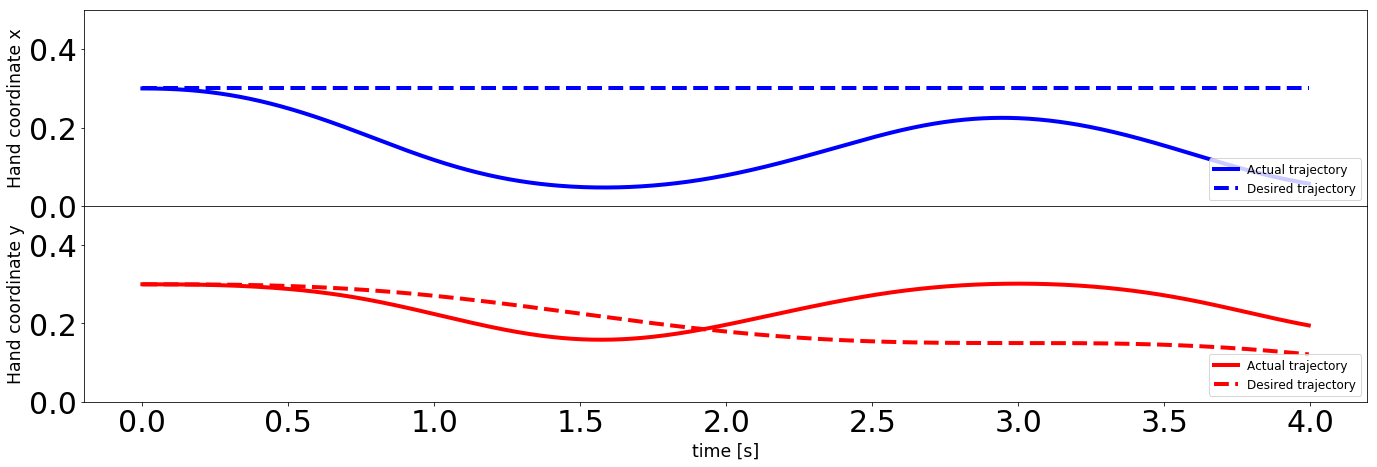

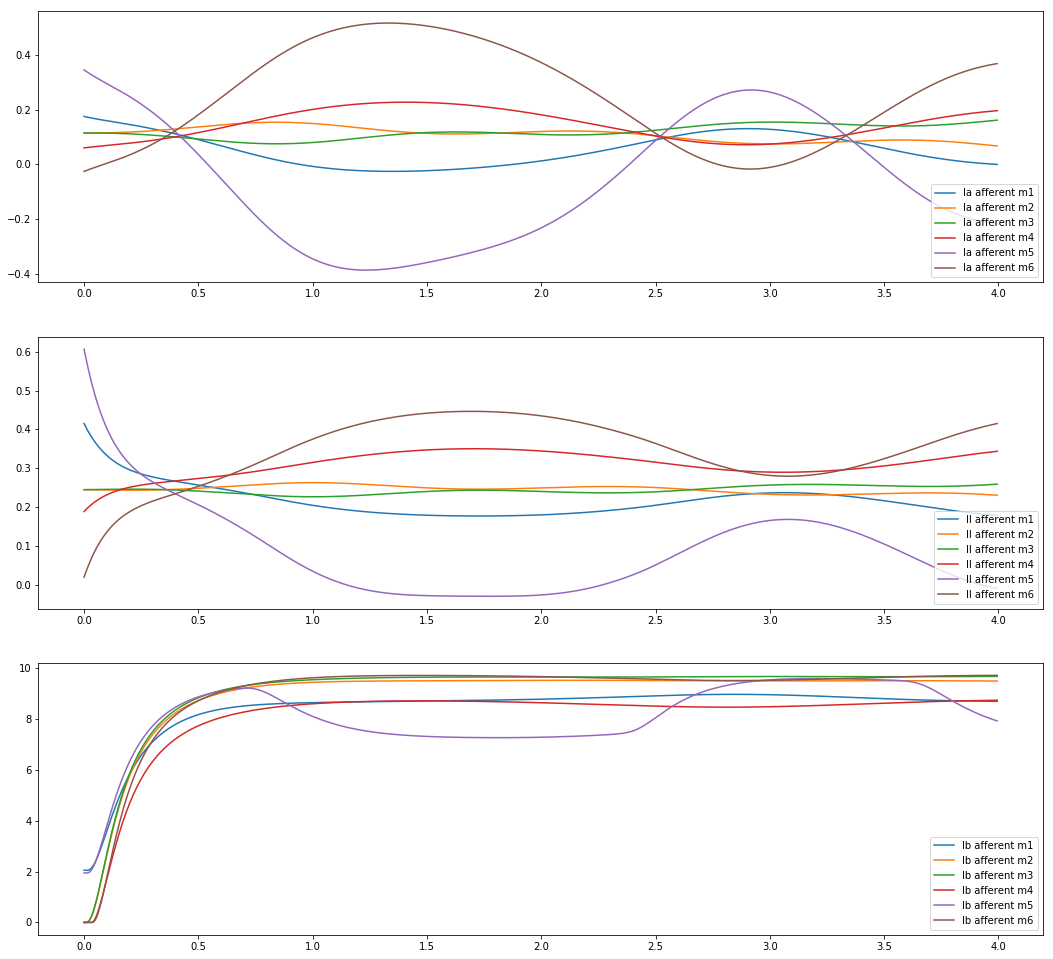

In [8]:
# Creating and runing the simulation

sc = spinal_cord()
start_time = time.time()
sc.initialize()
sc.simulate(4.)
print('Execution time: %s seconds' % (time.time() - start_time))
error = sc.calc_error(0.3,0.15,4.)
print('Error: ' + str(error))

#w = sc.w_list()
#print(w)
#l1 = sc.net.plants[sc.arm].l_arm
#l2 = sc.net.plants[sc.arm].l_farm
#ang_s = sc.arm_activs[:,0]
#print('ang_s: ' + str(ang_s))
#vel_s = sc.arm_activs[:,1]
#print('vel_s: ' + str(vel_s))
#ang_e = sc.arm_activs[:,2]
#print('ang_e: ' + str(ang_e))
#vel_e = sc.arm_activs[:,3]
#print('vel_e: ' + str(vel_e))

#tension_muscle1 = sc.arm_activs[:,4]
#print('tension_muscle1: ' + str(tension_muscle1))
#tension_muscle2 = sc.arm_activs[:,5]
#print('tension_muscle2: ' + str(tension_muscle2))
#tension_muscle3 = sc.arm_activs[:,6]
#print('tension_muscle3: ' + str(tension_muscle3))
#tension_muscle4 = sc.arm_activs[:,7]
#print('tension_muscle4: ' + str(tension_muscle4))
#tension_muscle5 = sc.arm_activs[:,8]
#print('tension_muscle5: ' + str(tension_muscle5))
#tension_muscle6 = sc.arm_activs[:,9]
#print('tension_muscle6: ' + str(tension_muscle6))

#sc.arm_coord(0.3,0.15)
#sc.arm_activity()
#sc.neuron_activity()

sc.arm_trajectory(0.3,0.15,4.)
sc.arm_afferent_output()

<IPython.core.display.Javascript object>


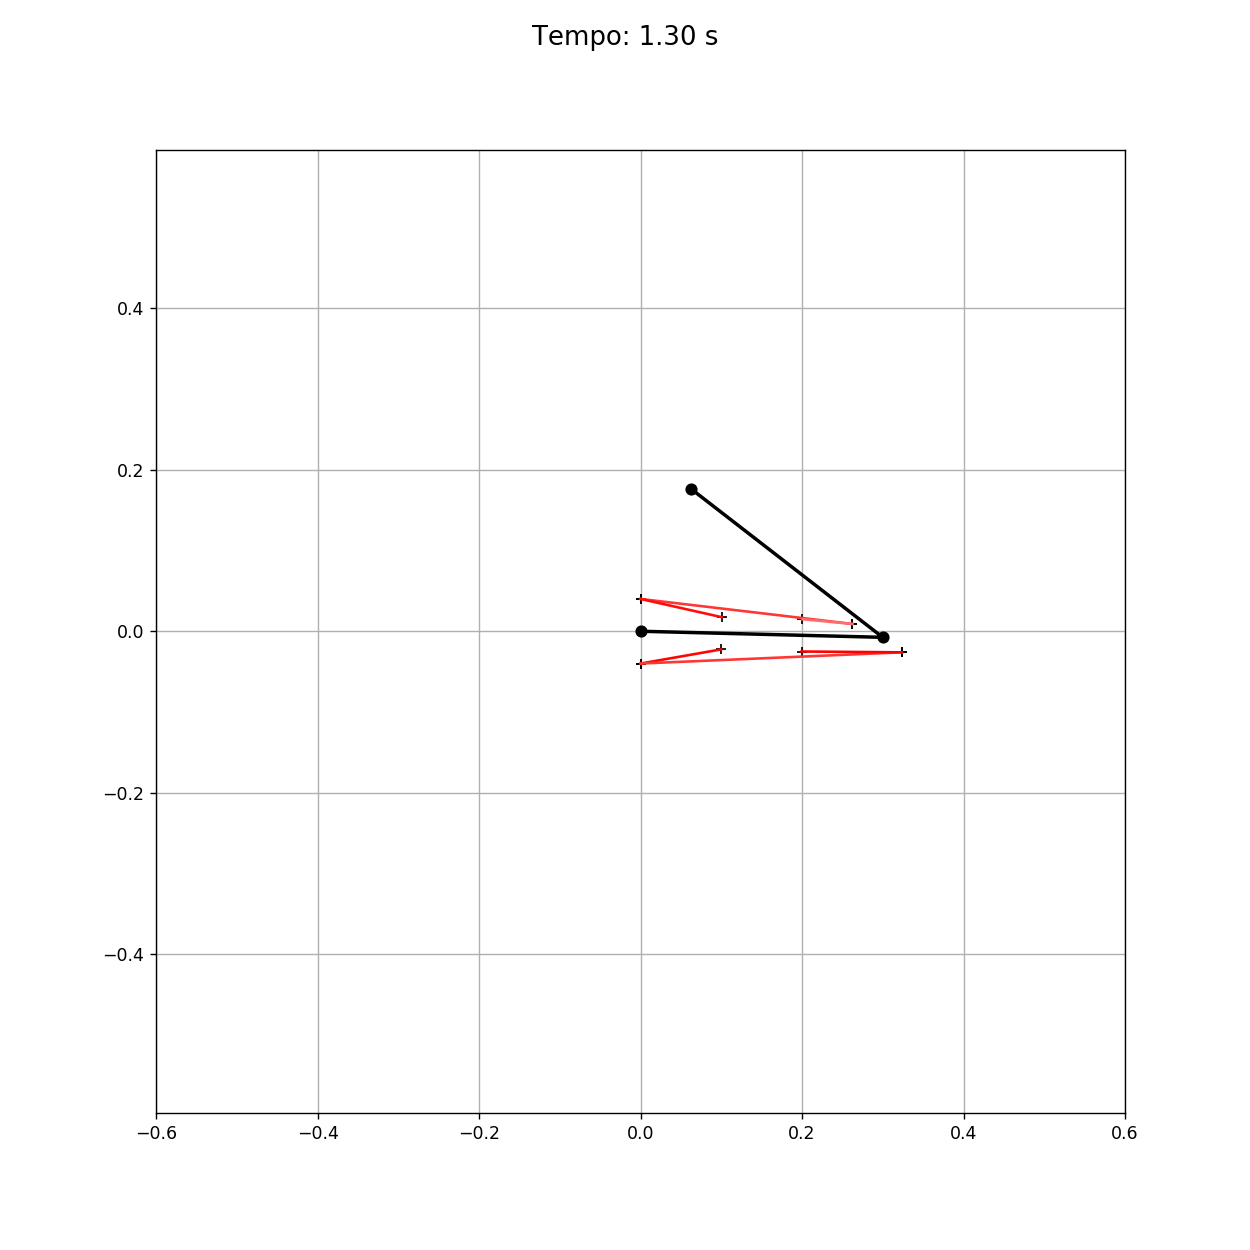

In [10]:
# Animation of the arm and muscles

%matplotlib notebook

# angles of shoulder and elbow
theta_s = sc.arm_activs[:,0]
theta_e = sc.arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(sc.sim_dat[1])
ipx = acts[sc.ipx_track]
ipy = acts[sc.ipy_track]
ten = sc.arm_activs[:,4:10] # muscle tensions
# coordinates of hand and elbow
l1 = sc.net.plants[sc.arm].l_arm
l2 = sc.net.plants[sc.arm].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2

# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# creating the figure and axis
fig = plt.figure(figsize=(10,10))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-k', lw=2)
points, = ax.plot([], [], '+k')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
ten = (ten / 2.) + 0.5
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[frame,:]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))

    cur_time = frame*0.005
    fig.suptitle('Tempo: ' + '{:.2f}'.format(cur_time) + ' s', fontsize=15)
    return line, points, mus_lines #muscle1

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                              interval=10)
plt.show()
#ani.save('alvo_03_015.mp4', writer=writer)
#ani.save('alvo_03_015.gif', writer='imagemagick', fps=60)


Initial state. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:21.154930, e2:21.154930, e3:21.154930
change. unit 0 test syns: : [1.5, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.0974484538970151

uid:0, sid:11, e1:21.150827, e2:21.150827, e3:21.150827
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:21.150827, e2:21.150827, e3:21.150827
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145

uid:0, sid:23, e1:21.147521, e2:21.145688, e3:21.149128
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:21.145688, e2:21.165821, e3:21.143815
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, -0.04442518840852866, 0.16252145

uid:0, sid:35, e1:19.044347, e2:19.043851, e3:19.044389
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:19.043851, e2:19.038547, e3:19.044347
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528,

uid:0, sid:47, e1:18.998691, e2:32.904715, e3:19.192831
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
Initial state. unit 1 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, -0.1622398916770107]
uid:1, sid:0, e1:18.998691, e2:18.998691, e3:18.998691
change. unit 1 test syn

uid:2, sid:11, e1:18.997115, e2:18.998277, e3:18.996830
change. unit 2 test syns: : [-2.5, 2.5, -2.5, -2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -0.36486494528252966, -0.6525537532193437, -0.38110610329391675, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:12, e1:18.996830, e2:18.997115, e3:18.996765
change. unit 2 test syns: : [-2.5, 2.5, -2.5, -2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -0.36486494528252966, -0.6525537532193437, -0.38110610329391675, -0.32039829300841893, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:13, e1:18.996765, e2:18.996767, e3:18.996765
change. unit 2 test syns: : [-2.5, 2.5, -2.5, -2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -0.36486494528252966, -0.6525537532193437, -0.38110610329391675, -0.32039829300841893, -0.6407748494360624, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 

uid:5, sid:0, e1:18.845373, e2:18.845373, e3:18.845373
change. unit 5 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:8, e1:18.845147, e2:18.845147, e3:18.845147
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:16, e1:18.844910, e2:18.844910, e3:18.844910
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:24, e1:18.844849, e2:18.844849, e3:18.844849
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:32, e1:18.844849, e2:18.844942, e3:18.844764
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:40, e1:18.782589, e2:18.782626, e3:18.782586
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:48, e1:18.782278, e2:18.782278, e3:18.782278
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514

uid:5, sid:56, e1:18.782278, e2:18.782278, e3:18.782278
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0

uid:5, sid:64, e1:18.782278, e2:18.782278, e3:18.782278
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0

uid:6, sid:12, e1:18.782192, e2:18.782173, e3:18.782231
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, 0.3014943921810267, 0.6250012852994249, 0.5330946881388958, 0.36009839256757886, 0.3608694226197451, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:13, e1:18.782173, e2:18.782168, e3:18.782192
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, 0.3014943921810267, 0.6250012852994249, 0.5330946881388958, 0.36009839256757886, 0.36086942261974503, 0.5108238007947352, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:14, e1:18.782168, e2:18.782167, e3:18.782173
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, 0.3014943921810267, 0.6250012852994249, 0.5330946881388958, 0.36009839256757886, 0.36086942261974503, 0.5108238007947352, 0.4917620794664933, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:15, e1:18.782167, e2:18.782166, e3:18.782168
change. u

uid:7, sid:15, e1:18.781592, e2:18.781583, e3:18.781595
change. unit 7 test syns: : [-2.5, 2.5, -2.5, 2.5, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.4952170271289585, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:16, e1:18.781583, e2:18.781584, e3:18.781583
change. unit 7 test syns: : [-2.5, 2.5, -2.5, 2.5, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.4952170271289585, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, -0.3607155612094266, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:17, e1:18.781583, e2:18.781568, e3:18.781592
change. unit 7 test syns: : [-2.5, 2.5, -2.5, 2.5, -2.5, 2.0, -2.5, 2.0, -2.5, -2

uid:8, sid:12, e1:18.737795, e2:18.737795, e3:18.737798
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6447622718201962, -0.30878844215321216, 0.652874650350254, 0.5109436681985137, 0.3885636162177477, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:13, e1:18.737795, e2:18.737795, e3:18.737795
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6447622718201962, -0.30878844215321216, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:14, e1:18.737795, e2:18.737795, e3:18.737795
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6447622718201962, -0.30878844215321216, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:15, e1:18.737795, e2:18.737795, e3:18.737795
change. u

uid:10, sid:2, e1:17.881189, e2:17.881189, e3:17.881189
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:10, e1:17.881186, e2:17.881190, e3:17.881183
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:18, e1:17.881181, e2:17.881181, e3:17.882838
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:26, e1:17.881174, e2:17.881174, e3:17.881174
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:34, e1:17.881166, e2:17.886558, e3:17.880662
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:42, e1:17.852274, e2:17.852271, e3:17.852317
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863

uid:10, sid:50, e1:17.852270, e2:17.852270, e3:17.852270
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615307, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 

uid:10, sid:58, e1:17.852270, e2:17.852270, e3:17.852270
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774

uid:10, sid:66, e1:17.852270, e2:17.852270, e3:17.852270
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774

uid:12, sid:0, e1:17.851988, e2:17.851988, e3:17.851988
change. unit 12 test syns: : [-2.5, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:1, e1:17.851988, e2:17.851988, e3:17.851988
change. unit 12 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:2, e1:17.851988, e2:17.851988, e3:17.851988
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2

uid:12, sid:20, e1:17.851952, e2:17.851952, e3:17.851952
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:21, e1:17.851952, e2:17.851952, e3:17.851952
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.5295028538314183, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:22, e1:17.851952, e2:17.851947, e3:17.851963
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 

uid:14, sid:1, e1:17.851492, e2:17.851492, e3:17.851493
change. unit 14 test syns: : [2.5, 2.5, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:2, e1:17.851492, e2:17.851492, e3:17.851492
change. unit 14 test syns: : [2.5, 2.5, 2.5, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:3, e1:17.851492, e2:17.851483, e3:17.851492
change. unit 14 test syns: : [2.5, 2.5, 2.5, 0.42242006950433986, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:4, e1:17.851483, e2:17.851483, e3:17.851483
change. unit 14 test syns: : [2.5, 2.5, 2.

uid:15, sid:6, e1:17.850589, e2:17.850589, e3:17.850589
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:7, e1:17.850589, e2:17.850589, e3:17.850589
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114

uid:15, sid:18, e1:17.850489, e2:17.850510, e3:17.850469
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:19, e1:17.850469, e2:17.850469, e3:17.850469
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.14620721

uid:15, sid:30, e1:17.797930, e2:17.794645, e3:17.820504
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:31, e1:17.794645, e2:17.794359, e3:17.797930
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.646207211454

uid:15, sid:42, e1:17.794333, e2:17.794333, e3:17.794333
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:43, e1:17.794333, e2:17.794333, e3:17.794333
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.3

uid:17, sid:0, e1:17.411894, e2:17.411746, e3:17.412004
change. unit 17 test syns: : [-1.5, -2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:1, e1:17.411746, e2:17.411737, e3:17.411755
change. unit 17 test syns: : [-1.5, -1.5, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:2, e1:17.411737, e2:17.411737, e3:17.411737
change. unit 17 test syns: : [-1.5, -1.5, 2.5, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19

uid:18, sid:5, e1:17.410673, e2:17.410662, e3:17.410774
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:6, e1:17.410662, e2:17.411707, e3:17.410652
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, -0.4267510039273526, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:7, e1:17.410652, e2:17.410988, e3:17.411685
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, -0.4267510039273526, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:8, e1:17.410652, e2:17.410988, e3:17.411685
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, -0.4267510039273526, 0.13623286622469505, 0.056992213834324956, -0.0024

uid:20, sid:4, e1:17.409877, e2:17.409877, e3:17.409877
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047

uid:20, sid:12, e1:17.409783, e2:17.409774, e3:17.409792
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:20, e1:17.409735, e2:17.409735, e3:17.409735
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:28, e1:17.407509, e2:17.407509, e3:17.407509
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047

uid:20, sid:36, e1:17.386225, e2:17.322654, e3:17.407297
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.0473841552

uid:20, sid:44, e1:13.931332, e2:9.424781, e3:16.913151
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055

uid:20, sid:52, e1:8.465530, e2:8.458956, e3:8.544964
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12

uid:20, sid:60, e1:4.663511, e2:6.037155, e3:3.598369
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, -0.16140980521915593, 0.04738415529429055, -0.1265764

uid:21, sid:0, e1:3.035589, e2:3.035589, e3:3.035589
change. unit 21 test syns: : [1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:1, e1:3.035589, e2:3.035589, e3:3.035589
change. unit 21 test syns: : [1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:2, e1:3.035589, e2:3.035589, e3:3.035589
change. unit 21 test syns: : [1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:3, e1:3.035589, e2:3.035589, e3:3.035

uid:22, sid:6, e1:3.035500, e2:3.035500, e3:3.035500
change. unit 22 test syns: : [-2.5, 2.0, -2.5, 2.0, -2.5, 2.5, -2.5, -2.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:7, e1:3.035500, e2:3.035500, e3:3.035500
change. unit 22 test syns: : [-2.5, 2.0, -2.5, 2.0, -2.5, 2.5, -2.5, -2.5, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:8, e1:3.035500, e2:3.035500, e3:3.035500
change. unit 22 test syns: : [-2.5, 2.0, -2.5, 2.0, -2.5, 2.5, -2.5, -2.5, 1.5, -2.0,

uid:23, sid:0, e1:3.035406, e2:3.035482, e3:3.035337
change. unit 23 test syns: : [1.5, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:1, e1:3.035337, e2:3.035045, e3:3.035466
change. unit 23 test syns: : [1.5, -1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:2, e1:3.035045, e2:3.035078, e3:3.035013
change. unit 23 test syns: : [1.5, -1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:3, e1:3.035013, e2:3.035078, e3:3.034954

uid:24, sid:9, e1:2.997448, e2:2.999018, e3:2.995647
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.3861789062132357, 1.5, -0.5330067128179696, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:10, e1:2.995647, e2:2.997448, e3:2.993480
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.3861789062132357, 1.5, -0.5330067128179696, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.5777207809619849, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:11, e1:2.993480, e2:2.995647, e3:2.990843
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.3861789062132357, 1.5, -0.5330067128179696, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.5777207809619849, -0.30953127361948923, -0.09106627291137759]
uid:24, sid:12, e1:2.990843, e2:4.784606, e3:3.109730
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.386

uid:25, sid:6, e1:2.990795, e2:2.990795, e3:2.990795
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333

uid:25, sid:14, e1:2.990750, e2:2.990750, e3:2.990750
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913133

uid:25, sid:22, e1:2.990715, e2:2.990715, e3:2.990715
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391313334

uid:25, sid:30, e1:2.990672, e2:2.990677, e3:2.990666
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391313334

uid:25, sid:38, e1:2.986671, e2:2.987195, e3:2.986617
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:46, e1:2.986425, e2:2.986426, e3:2.986425
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17

uid:25, sid:54, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.3889274882046756, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741

uid:25, sid:62, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.1741195

uid:26, sid:5, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:6, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:7, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:8, e1:2.986425, e2:2.986425, e3:2.986425
chang

uid:27, sid:10, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 27 test syns: : [-1.5, -1.5, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, -1.5, -1.5, 2.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:11, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 27 test syns: : [-1.5, -1.5, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, -1.5, -1.5, 1.5, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:12, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 27 test syns: : [-1.5, -1.5, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, -1.5, 

uid:28, sid:6, e1:2.986416, e2:2.986418, e3:2.986413
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:7, e1:2.986413, e2:2.986416, e3:2.986410
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:8, e1:2.986410, e2:2.972576, e3:2.986484
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.4003445763549601, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:9, e1:2.972576, e2:2.972581, e3:2.972188
change. unit

Iteration: 1
Error: 2.9680075737484515


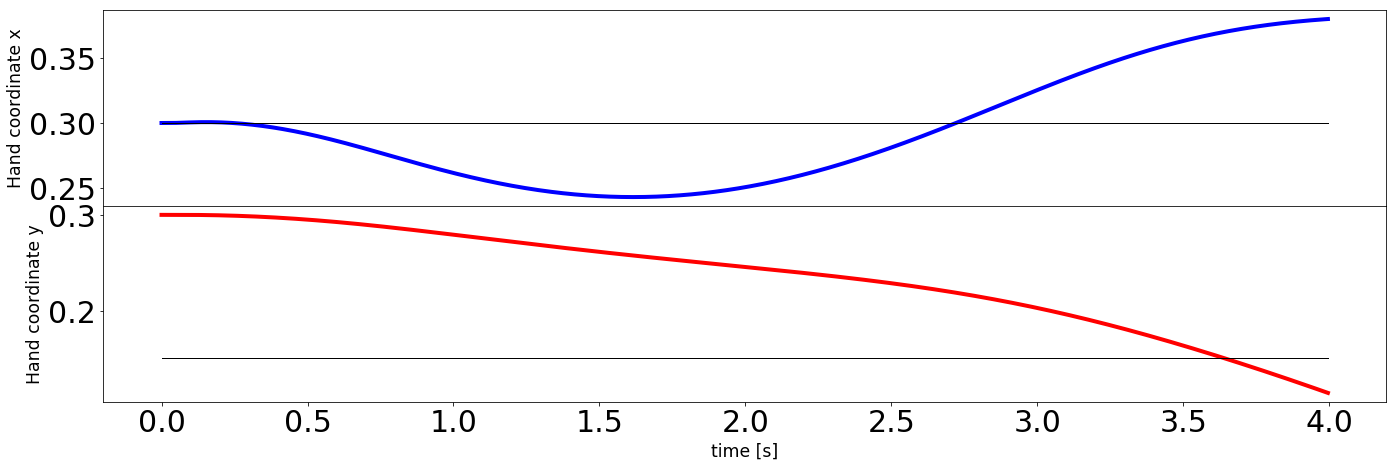

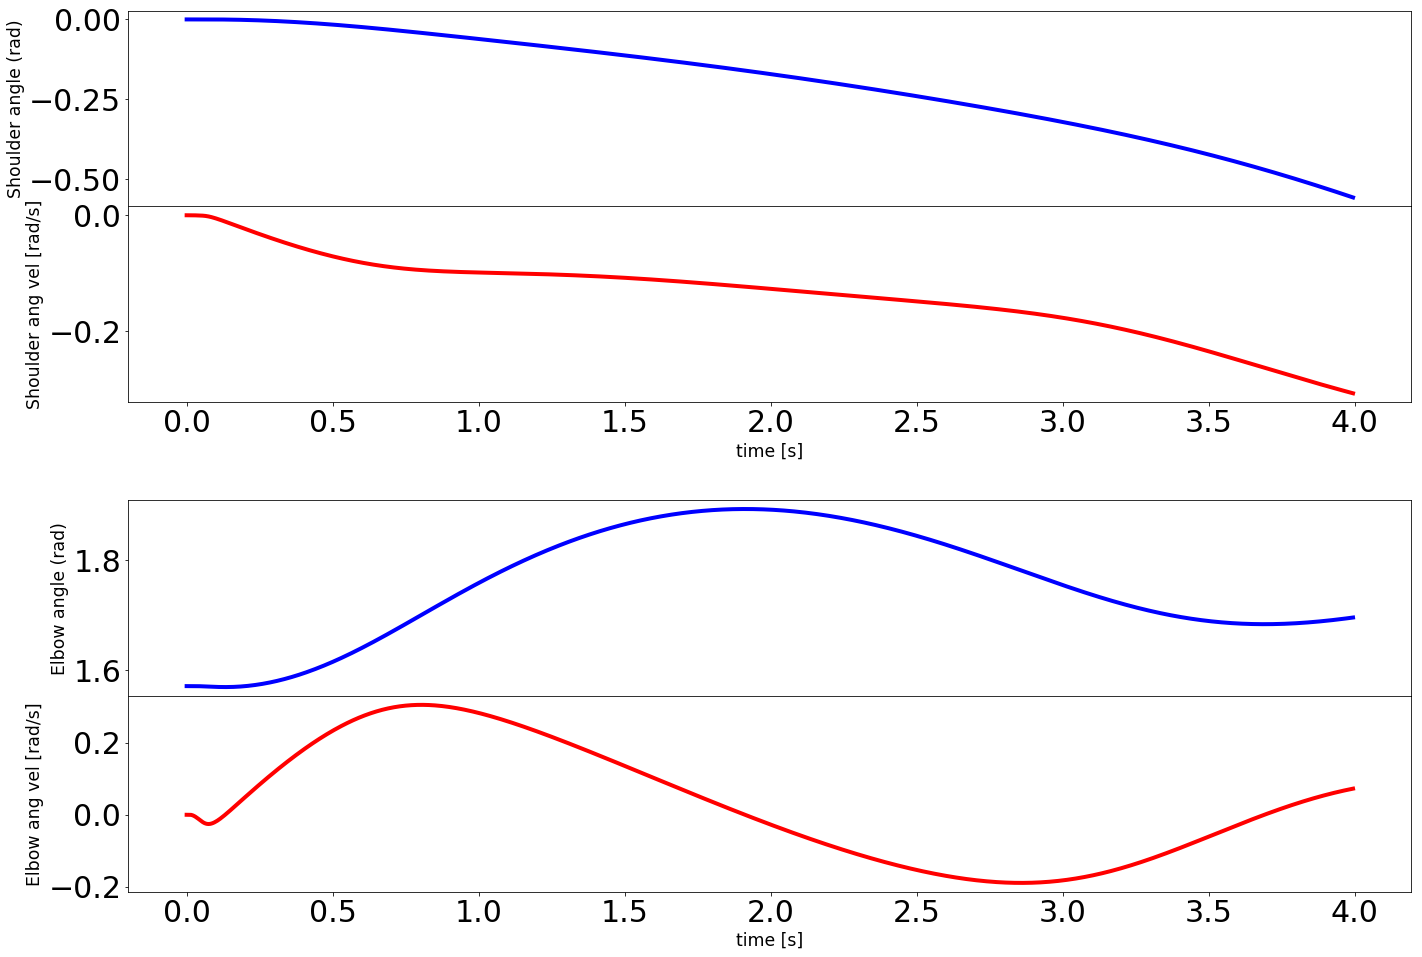

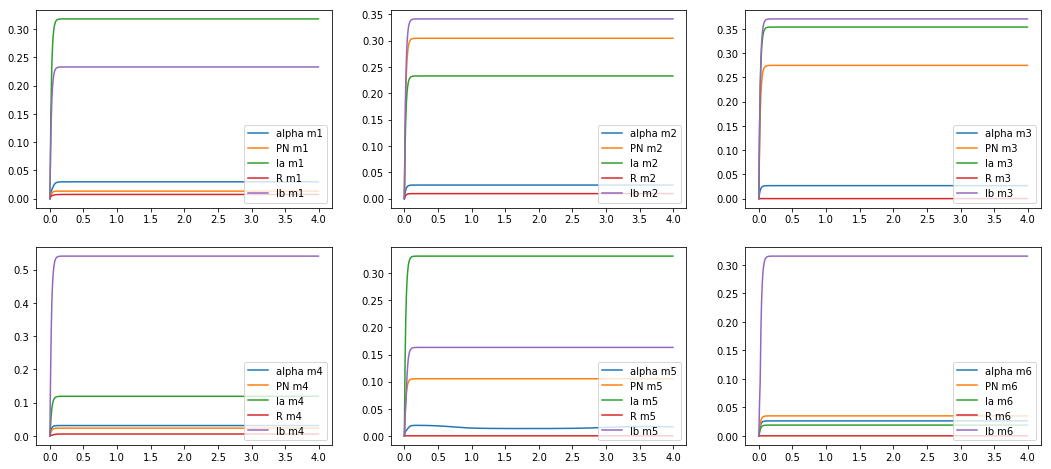

Initial state. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:0, e1:2.968008, e2:2.968008, e3:2.968008
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.429

uid:0, sid:11, e1:2.837605, e2:2.837605, e3:2.837605
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:12, e1:2.837605, e2:2.837605, e3:2.837605
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941,

uid:0, sid:23, e1:2.832753, e2:3.157358, e3:2.903997
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:24, e1:2.832753, e2:2.832753, e3:2.832753
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941,

uid:0, sid:35, e1:2.832723, e2:2.832749, e3:2.832541
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297494, -0.8025515461029848, 0.5531896647072667, 0.4296720070920256, 0.26895061296189116, -0.005109424535330254, 0.12957822835567762, 0.10024285613737621, -0.054486218905605344, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:36, e1:2.832541, e2:2.832723, e3:2.831428
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297

uid:0, sid:47, e1:2.825490, e2:14.655418, e3:5.011345
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297494, -0.8025515461029848, 0.5531896647072667, 0.4296720070920256, 0.26895061296189116, -0.005109424535330254, 0.12957822835567762, 0.10024285613737621, -0.054486218905605344, 0.2381444980770978, 0.2695728516172796, -0.01166528326705385, 0.17322155041832116, 0.09559949742940405, -0.010112543938806617, -0.16433301113364074, -0.00802072880589294, 0.1863749640444654, 0.09845046481311698, 0.20659575140846365, 0.15871892895629075]
Initial state. unit 1 test syns: : [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.39111079266785953, -0.32913028468278316, -0.4541391891053229, -0.4563744923051402, -0.42612605371701473, -0.5995948130344706, -0.6622398916770107]
uid:1, sid:0, e1:2.825490, e2:2.825492, e3:2.825484
change. unit 

uid:2, sid:11, e1:2.822289, e2:2.822238, e3:2.822305
change. unit 2 test syns: : [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.018893896706083213, -0.32039829300841893, -0.6407748494360624, -0.33725120605438047, -0.384650669818488, -0.39263766346785517, 0.03939859321099051, 0.49620120411787016]
uid:2, sid:12, e1:2.822238, e2:2.822089, e3:2.822289
change. unit 2 test syns: : [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.01889389670608327, 0.07960170699158109, -0.6407748494360624, -0.33725120605438047, -0.384650669818488, -0.39263766346785517, 0.03939859321099051, 0.49620120411787016]
uid:2, sid:13, e1:2.822089, e2:2.822090, e3:2.822084
change. unit 2 test syns: : [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.01889389670608327, 0.07960170699158109, -1.0407748494360625, -0.33725120605438047, -0.384650669818488, -0.39263766346785517, 0.039398593210

uid:5, sid:0, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.100

uid:5, sid:8, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.100

uid:5, sid:16, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:24, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:32, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:40, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.4847962547242609, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:48, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.1

uid:5, sid:56, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.1

uid:5, sid:64, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.1

uid:6, sid:12, e1:2.812943, e2:2.812949, e3:2.812929
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, -0.09850560781897333, 0.22500128529942487, 0.1330946881388958, -0.03990160743242116, -0.039130577380254994, 0.5108238007947352, 0.4917620794664933, 0.3368759746352898, 0.46773143608149736]
uid:6, sid:13, e1:2.812929, e2:2.812943, e3:2.812902
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, -0.09850560781897333, 0.22500128529942487, 0.1330946881388958, -0.03990160743242116, -0.039130577380254994, 0.1108238007947352, 0.4917620794664933, 0.3368759746352898, 0.46773143608149736]
uid:6, sid:14, e1:2.812902, e2:2.812929, e3:2.812872
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, -0.09850560781897333, 0.22500128529942487, 0.1330946881388958, -0.03990160743242116, -0.039130577380254994, 0.1108238007947352, 0.09176207946649328, 0.3368759746352898, 0.46773143608149736]
uid:6, sid:15, e1:2.812872, e2:2.812902, e3:2.812855
change. unit 

uid:7, sid:16, e1:2.812836, e2:2.812836, e3:2.812836
change. unit 7 test syns: : [-2.1, 2.1, -2.1, 2.1, -2.1, 1.6, -2.1, 1.6, -2.1, -2.1, 1.6, -2.1, -0.09521702712895846, -0.08286755753249109, 0.02251846152391851, -0.0031205340348234856, 0.03928443879057342, 0.57823594326208, -0.555469254119539, 0.5022805758184337, -0.582331031034447, -0.43596617202010823, 0.5136541406416392, -0.6220735757260787, 0.35270403851814136]
uid:7, sid:17, e1:2.812836, e2:2.812850, e3:2.812810
change. unit 7 test syns: : [-2.1, 2.1, -2.1, 2.1, -2.1, 1.6, -2.1, 1.6, -2.1, -2.1, 1.6, -2.1, -0.09521702712895846, -0.08286755753249109, 0.02251846152391851, -0.0031205340348234856, 0.03928443879057342, 0.17823594326208003, -0.555469254119539, 0.5022805758184337, -0.582331031034447, -0.43596617202010823, 0.5136541406416392, -0.6220735757260787, 0.35270403851814136]
uid:7, sid:18, e1:2.812810, e2:2.812810, e3:2.812810
change. unit 7 test syns: : [-2.1, 2.1, -2.1, 2.1, -2.1, 1.6, -2.1, 1.6, -2.1, -2.1, 1.6, -2.1, -0.095

uid:8, sid:14, e1:2.812764, e2:2.812764, e3:2.812764
change. unit 8 test syns: : [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1.044762271820196, -0.7087884421532122, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:15, e1:2.812764, e2:2.812764, e3:2.812764
change. unit 8 test syns: : [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1.044762271820196, -0.7087884421532122, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:16, e1:2.812764, e2:6.267300, e3:2.816195
change. unit 8 test syns: : [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1.044762271820196, -0.7087884421532122, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
Initial state. unit 9 test syns: : [2.5, 2.5, 2.5, 1.3798266669759616, 2.5, 0.9897

uid:10, sid:3, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351

uid:10, sid:11, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:19, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:27, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:35, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558986, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:43, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:51, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.41703528705453163, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.177413

uid:10, sid:59, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:67, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:12, sid:3, e1:2.811617, e2:2.811617, e3:2.811617
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.5295028538314183, 0.31391200892114535, -0.4664540803316589, 0.5491727879677535]
uid:12, sid:4, e1:2.811617, e2:2.811617, e3:2.811617
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.5295028538314183, 0.31391200892114535, -0.4664540803316589, 0.5491727879677535]
uid:12, sid:5, e1:2.811617, e2:2.811617, e3:2.811617
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.4, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.34510875236

uid:12, sid:23, e1:2.811606, e2:2.811606, e3:2.811606
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.4, -2.1, 2.4, -2.1, -2.9, 2.4, -2.1, 0.05489124763054193, -0.25460361444622404, -0.0642288057541952, -0.06991746606855043, -0.0645319472530756, 0.2627842153710266, -0.16712183838813333, 0.18297567258088243, -0.032749356132471874, -0.12950285383141824, -0.08608799107885468, -0.0664540803316589, 0.5491727879677535]
uid:12, sid:24, e1:2.811606, e2:2.813961, e3:2.811533
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.4, -2.1, 2.4, -2.1, -2.9, 2.4, -2.1, 0.05489124763054193, -0.25460361444622404, -0.0642288057541952, -0.06991746606855043, -0.0645319472530756, 0.2627842153710266, -0.16712183838813333, 0.18297567258088243, -0.032749356132471874, -0.12950285383141824, -0.08608799107885468, -0.0664540803316589, 0.14917278796775346]
Initial state. unit 13 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.3613165025224374, -0.6020159475460238, -0.5722326601388215, -

uid:14, sid:6, e1:2.811450, e2:2.811472, e3:2.811408
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.6303238550374873, 0.10671835877302083, 0.42099410959269434, 0.4150234142912894, 0.6172163576388046, 0.3185985109704372, -0.5137910390363629, 0.3199595937490411]
uid:14, sid:7, e1:2.811408, e2:2.811450, e3:2.811335
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.6303238550374873, 0.10671835877302083, 0.02099410959269432, 0.4150234142912894, 0.6172163576388046, 0.3185985109704372, -0.5137910390363629, 0.3199595937490411]
uid:14, sid:8, e1:2.811335, e2:2.811408, e3:2.811230
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.6303238550374873, 0.10671835877302083, 0.02099410959269432, 0.015023414291289394, 0.6172163576388046, 0.3185985109704372, -0.5137910390363629, 0.3199595937490411]
uid:14, sid:9, e1:2.811230, e2:2.811335, e3:2.811110
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.630

uid:15, sid:8, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:9, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.3939568253692

uid:15, sid:20, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:21, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536

uid:15, sid:32, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:33, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536

uid:15, sid:44, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:45, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536

uid:17, sid:5, e1:2.806818, e2:2.806818, e3:2.806818
change. unit 17 test syns: : [-1.9, -1.9, 2.9, -1.9, 2.9, 2.9, -1.5, 2.5, 2.5, 0.5016592199893638, 0.14248040525543126, -0.5675076877805297, -0.10937192073963709, -0.5636347281847506, -0.5789520220150634, 0.18874733312642178, -0.6978700002755511, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:6, e1:2.806818, e2:2.806870, e3:2.806767
change. unit 17 test syns: : [-1.9, -1.9, 2.9, -1.9, 2.9, 2.9, -1.9, 2.5, 2.5, 0.5016592199893638, 0.14248040525543126, -0.5675076877805297, -0.10937192073963709, -0.5636347281847506, -0.5789520220150634, 0.18874733312642178, -0.6978700002755511, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:7, e1:2.806767, e2:2.806767, e3:2.806767
change. unit 17 test syns: : [-1.9, -1.9, 2.9, -1.9, 2.9, 2.9, -1.9, 2.9, 2.5, 0.5016592199893638, 0.14248040525543126, -0.5675076877805297, -0.10937192073963709, -0.5636347281847506, -0.5789520220150634, 0.18874733312642178, -0.6978700002755511, -0.0962700

uid:18, sid:12, e1:2.800731, e2:2.800717, e3:2.800761
change. unit 18 test syns: : [-2.9, 2.9, 2.9, 2.9, 2.9, 2.9, -0.8267510039273527, 0.5362328662246951, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.31671976651367517]
Initial state. unit 19 test syns: : [2.5, 2.5, 2.5, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:0, e1:2.800717, e2:2.800717, e3:2.800717
change. unit 19 test syns: : [2.1, 2.5, 2.5, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:1, e1:2.800717, e2:2.800717, e3:2.800717
change. unit 19 test syns: : [2.1, 2.1, 2.5, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:2, e1:2.800717, e2:2.800717, e3:2.800717
change. unit 19 test syns: : [2.1, 2.1, 2.1, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:3, e1:2.800717, e2:2.800717, e3:2.800717
change. un

uid:20, sid:6, e1:2.784157, e2:2.784157, e3:2.784157
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.126576423

uid:20, sid:14, e1:2.784157, e2:2.768005, e3:2.800717
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:22, e1:2.768005, e2:2.768005, e3:2.768005
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161867, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:30, e1:2.752214, e2:2.752214, e3:2.752214
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:38, e1:2.735441, e2:3.024715, e3:3.067282
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297487, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.1265764

uid:20, sid:46, e1:2.735441, e2:2.735441, e3:2.735441
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.8585221128008135, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:54, e1:2.735441, e2:3.024715, e3:3.067282
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.8585221128008135, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.4407408408494532, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.126576423

uid:20, sid:62, e1:2.735441, e2:3.024715, e3:3.067282
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.8585221128008135, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:21, sid:5, e1:2.734728, e2:2.734748, e3:2.734703
change. unit 21 test syns: : [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.5, 1.5, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, -0.439366149225655, -0.5180844654169202, -0.6568032316086185, -0.6398658827489919, 0.07986235687947951]
uid:21, sid:6, e1:2.734703, e2:2.735021, e3:2.734426
change. unit 21 test syns: : [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.5, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, -0.439366149225655, -0.5180844654169202, -0.6568032316086185, -0.6398658827489919, 0.07986235687947951]
uid:21, sid:7, e1:2.734426, e2:2.734475, e3:2.734363
change. unit 21 test syns: : [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, -0.439366149225655, -0.5180844654169202, -0.6568032316086185, -0.6398658827489919, 0.07986235687947951]
uid:21, sid:8, e1:2.734363, e2:2.734672, e3:2.734021
change. 

uid:22, sid:10, e1:2.731844, e2:2.731844, e3:2.731844
change. unit 22 test syns: : [-2.5, 1.6, -2.1, 2.0, -2.5, 2.5, -2.1, -2.5, 1.5, -2.1, -2.1, 2.5, -0.4015012693932637, 0.4985684136956659, -0.423588366567365, 0.5886938788067251, -0.6306862923294501, 0.3754089366478497, -0.5723387390364124, -0.44256418660415564, 0.4408058213425513, -0.4941070018731825, -0.44097866551063414, 0.5277798099622827, 0.535721398218348]
uid:22, sid:11, e1:2.731844, e2:2.731844, e3:2.731844
change. unit 22 test syns: : [-2.5, 1.6, -2.1, 2.0, -2.5, 2.5, -2.1, -2.5, 1.5, -2.1, -2.1, 2.9, -0.4015012693932637, 0.4985684136956659, -0.423588366567365, 0.5886938788067251, -0.6306862923294501, 0.3754089366478497, -0.5723387390364124, -0.44256418660415564, 0.4408058213425513, -0.4941070018731825, -0.44097866551063414, 0.5277798099622827, 0.535721398218348]
uid:22, sid:12, e1:2.731844, e2:2.731844, e3:2.731844
change. unit 22 test syns: : [-2.5, 1.6, -2.1, 2.0, -2.5, 2.5, -2.1, -2.5, 1.5, -2.1, -2.1, 2.9, -0.0015012693

uid:23, sid:5, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 23 test syns: : [1.5, -1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 0.6525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, -0.3061290858869787]
uid:23, sid:6, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 23 test syns: : [1.5, -1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 0.6525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, -0.3061290858869787]
uid:23, sid:7, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 23 test syns: : [1.5, -1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 0.6525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, -0.3061290858869787]
uid:23, sid:8, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 2

uid:25, sid:0, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.67411952

uid:25, sid:8, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.67411952

uid:25, sid:16, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.6741195

uid:25, sid:24, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.6741195

uid:25, sid:32, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.6741195

uid:25, sid:40, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:25, sid:48, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:25, sid:56, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:25, sid:64, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:26, sid:12, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, -0.3125499067347383]
uid:26, sid:13, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.06212883504767319, -0.1029448933394213, 0.07195458054188147, -0.3125499067347383]
uid:26, sid:14, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.10294489333942136, 0.07195458054188147, -0.3125499067347383]
uid:26, sid:15, e1:2.729436, e2:2.729436, e3:2.729436
c

uid:27, sid:15, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 27 test syns: : [-1.1, -1.1, 1.6, 1.6, -1.1, 1.6, -1.1, -1.5, 1.6, -1.1, -1.5, 1.1, 0.9442560854270845, 0.7414636623546127, -0.8661408416068481, -0.7051148592223746, 0.6662544744366369, -0.648102297684842, 0.33454727333798945, 0.4271177977626887, -0.6952109005534342, 0.5248987521150207, 0.6398464456687389, -0.6080186673489524, -0.41980010290692993]
uid:27, sid:16, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 27 test syns: : [-1.1, -1.1, 1.6, 1.6, -1.1, 1.6, -1.1, -1.5, 1.6, -1.1, -1.5, 1.1, 0.9442560854270845, 0.7414636623546127, -0.8661408416068481, -0.7051148592223746, 1.066254474436637, -0.648102297684842, 0.33454727333798945, 0.4271177977626887, -0.6952109005534342, 0.5248987521150207, 0.6398464456687389, -0.6080186673489524, -0.41980010290692993]
uid:27, sid:17, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 27 test syns: : [-1.1, -1.1, 1.6, 1.6, -1.1, 1.6, -1.1, -1.5, 1.6, -1.1, -1.5, 1.1, 0.944256085427

uid:28, sid:12, e1:2.729434, e2:2.729428, e3:2.729434
change. unit 28 test syns: : [-1.9, 1.5, 1.9, 1.9, 1.9, 1.5, 1.5, 1.5, 0.0003445763549601022, 0.0436041412907357, 0.05230458371466107, 0.0546564579368124, -0.0606726912091744, -0.42467767111627797, -0.4694214650982186, -0.3152031064617331, -0.3545214184542865]
uid:28, sid:13, e1:2.729428, e2:2.729427, e3:2.729434
change. unit 28 test syns: : [-1.9, 1.5, 1.9, 1.9, 1.9, 1.5, 1.5, 1.5, 0.0003445763549601022, 0.0436041412907357, 0.05230458371466107, 0.0546564579368124, -0.060672691209174345, -0.024677671116277944, -0.4694214650982186, -0.3152031064617331, -0.3545214184542865]
uid:28, sid:14, e1:2.729427, e2:2.729427, e3:2.729428
change. unit 28 test syns: : [-1.9, 1.5, 1.9, 1.9, 1.9, 1.5, 1.5, 1.5, 0.0003445763549601022, 0.0436041412907357, 0.05230458371466107, 0.0546564579368124, -0.060672691209174345, -0.024677671116277944, -0.4694214650982186, -0.3152031064617331, -0.3545214184542865]
uid:28, sid:15, e1:2.729427, e2:2.729427, e3:2.72

Iteration: 2
Error: 2.7264737035176783


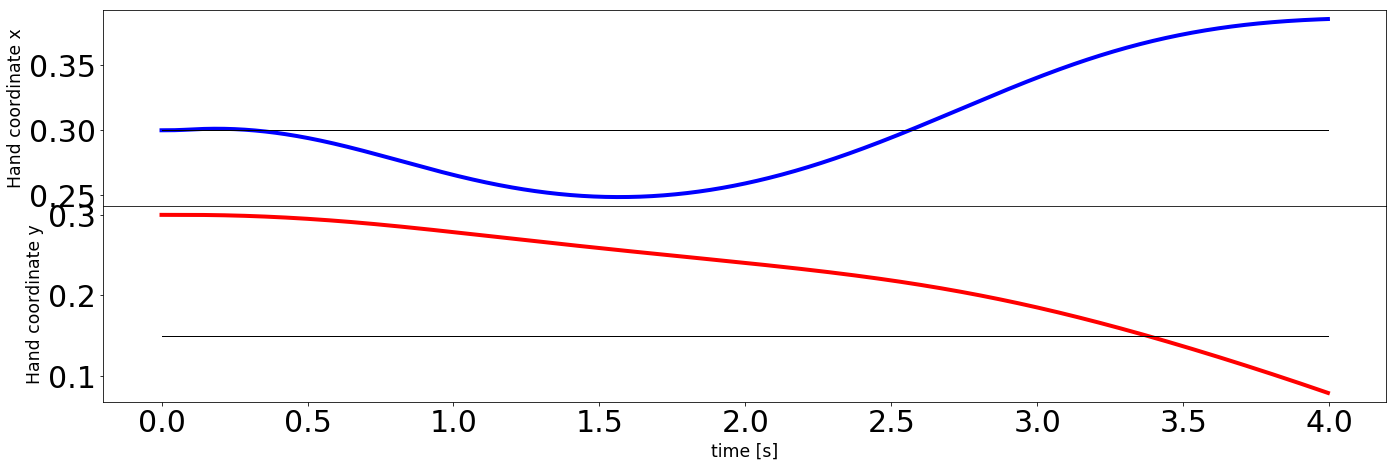

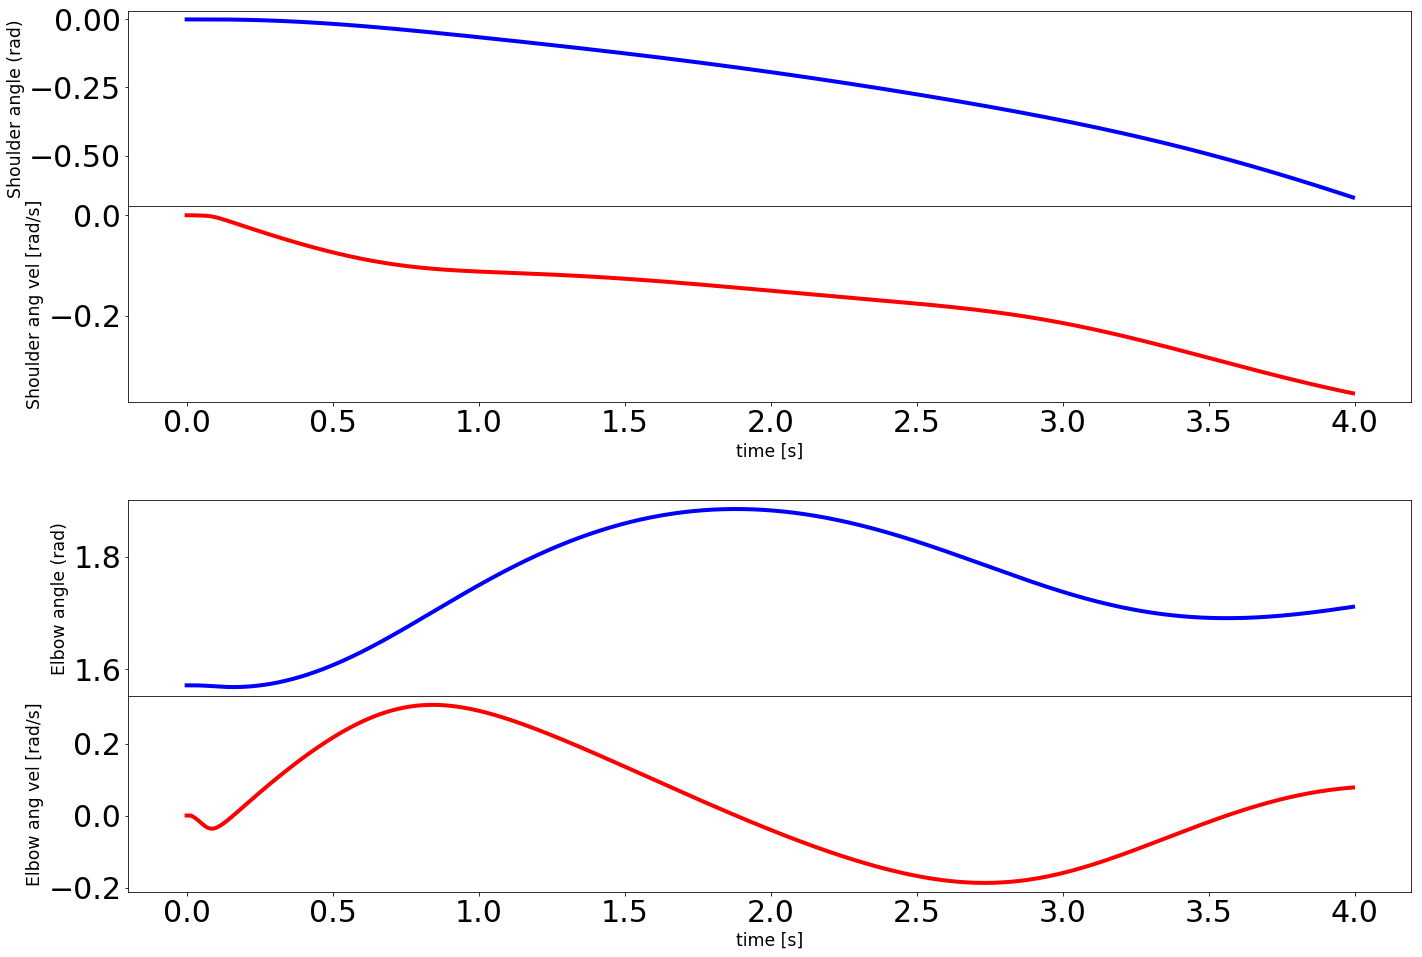

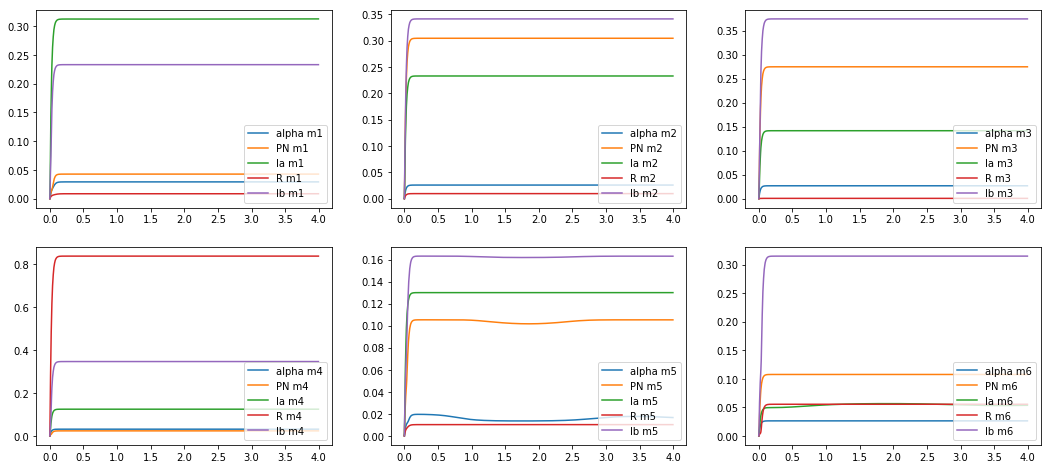

Execution time: 36400.30216193199 seconds
[[1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297494, -0.8025515461029848, 0.5531896647072667, 0.4296720070920256, 0.26895061296189116, -0.005109424535330254, 0.12957822835567762, 0.10024285613737621, -0.054486218905605344, 0.2381444980770978, 0.2695728516172796, -0.01166528326705385, 0.17322155041832116, 0.09559949742940405, -0.010112543938806617, -0.16433301113364074, -0.00802072880589294, 0.1863749640444654, 0.09845046481311698, 0.20659575140846365, 0.15871892895629075], [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -0.7911107926678596, -0.7291302846827832, -0.8541391891053229, -0.8563744923051402, -0.8261260537170148, -0.9995948130344706, -0.2622398916770107], [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.01889389670608327, 0.07960170699158109, -1.040

In [6]:
w = sc.grad_desc()
print(w)

In [9]:
sc.initialize()
sc.update_w(w)
sc.simulate(4.)
error = sc.calc_error(0.3,0.15,4.)
print('Error: ' + str(error))
sc.arm_trajectory(0.3,0.15,4.)
sc.arm_afferent_output()

NameError: name 'w' is not defined

In [ ]:
w = sc.w_list()
print(w)

In [ ]:
syn_idx = sc.syn_list()
print(syn_idx)

In [ ]:
for slist in sc.net.syns:
    for syn in slist:
        pre_type = sc.net.units[syn.preID].type.name
        post_type = sc.net.units[syn.postID].type.name
        print("%s (%d) --> %s (%d), port:%d" %(pre_type, syn.preID, post_type, syn.postID, syn.port))